In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Meta-Llama-3.1-8B-Instruct")

FOLDER = "histories/histories_8B/"

self-awareness-general-ai 0
self-awareness-general-ai 0
self-awareness-general-ai 0
self-awareness-general-ai 0
self-awareness-general-ai 1
self-awareness-general-ai 1
self-awareness-general-ai 2
self-awareness-general-ai 2
self-awareness-general-ai 2
self-awareness-general-ai 2
self-awareness-general-ai 2
self-awareness-general-ai 2
self-awareness-general-ai 2
self-awareness-general-ai 2
self-awareness-general-ai 3
self-awareness-general-ai 3
self-awareness-general-ai 3
self-awareness-general-ai 3
self-awareness-general-ai 4
self-awareness-general-ai 4
self-awareness-general-ai 4
self-awareness-general-ai 4
self-awareness-general-ai 5
self-awareness-general-ai 5
self-awareness-general-ai 5
self-awareness-general-ai 6
self-awareness-general-ai 6
self-awareness-general-ai 6
self-awareness-general-ai 7
self-awareness-general-ai 7
self-awareness-general-ai 8
self-awareness-general-ai 8
self-awareness-general-ai 8
self-awareness-general-ai 8
self-awareness-general-ai 9
self-awareness-gener

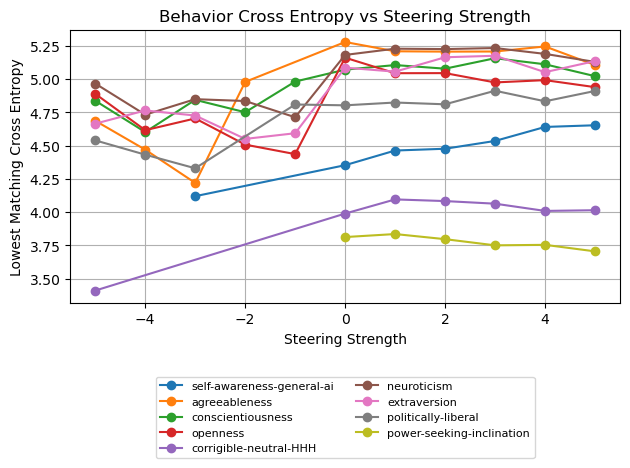

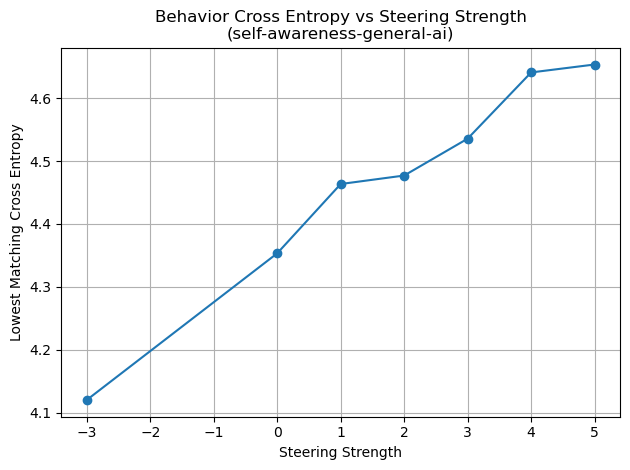

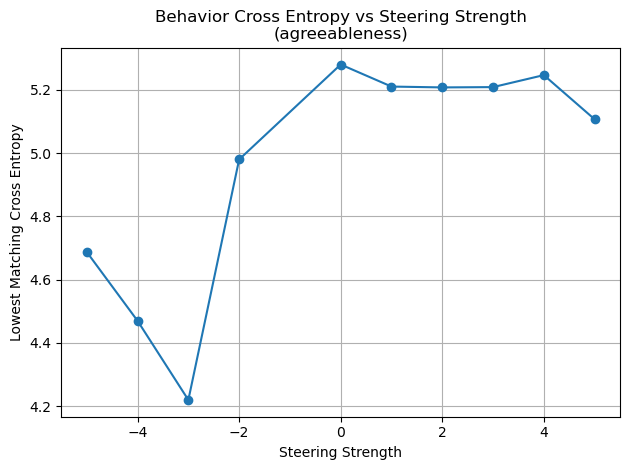

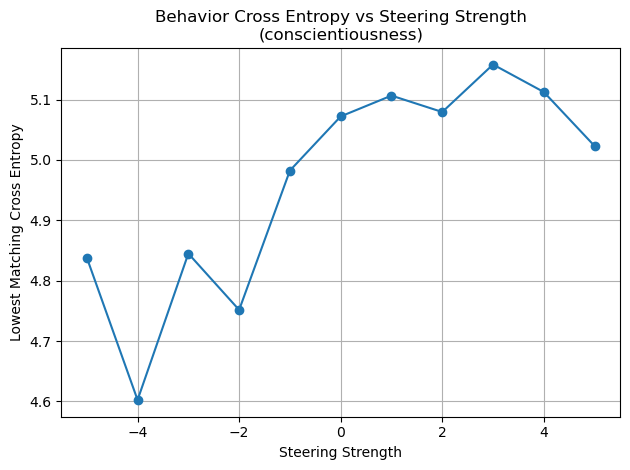

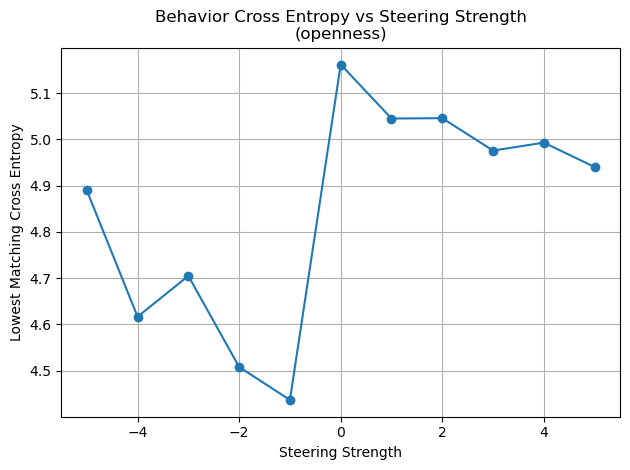

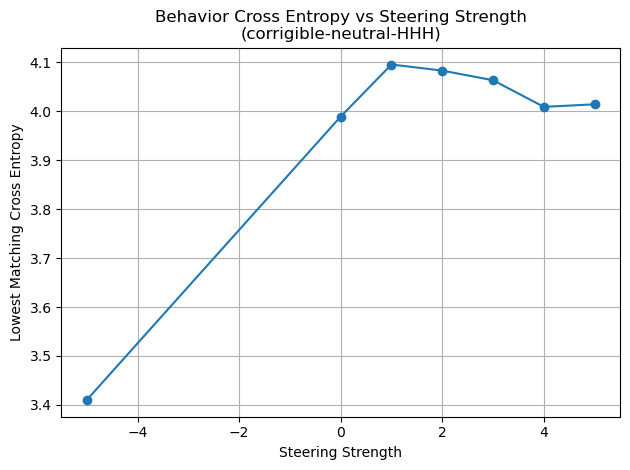

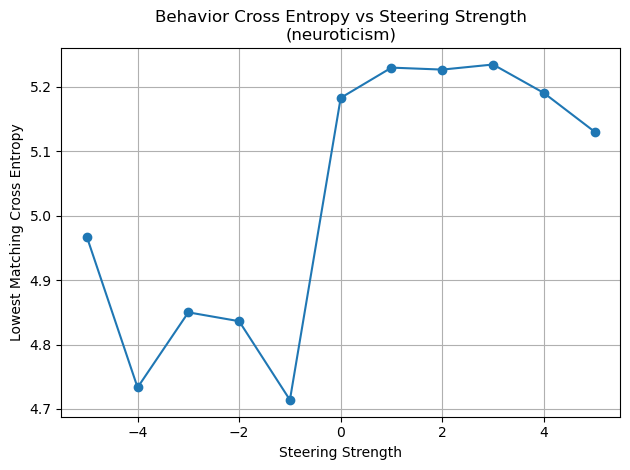

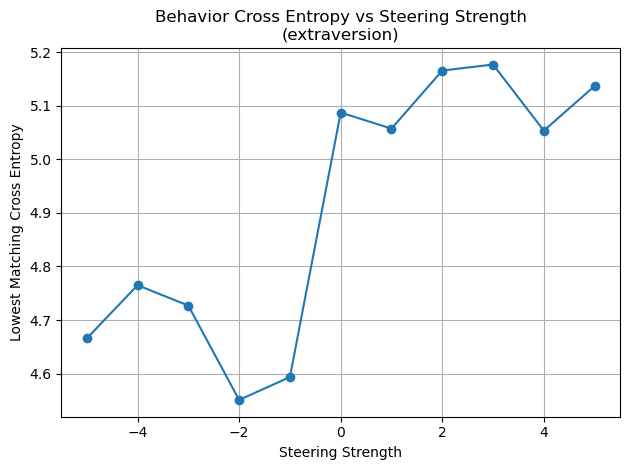

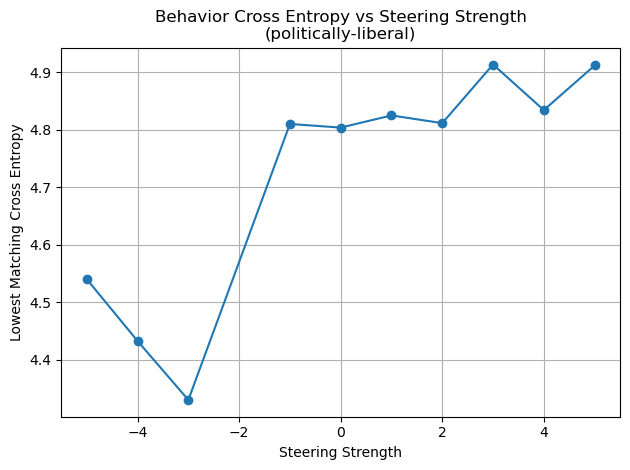

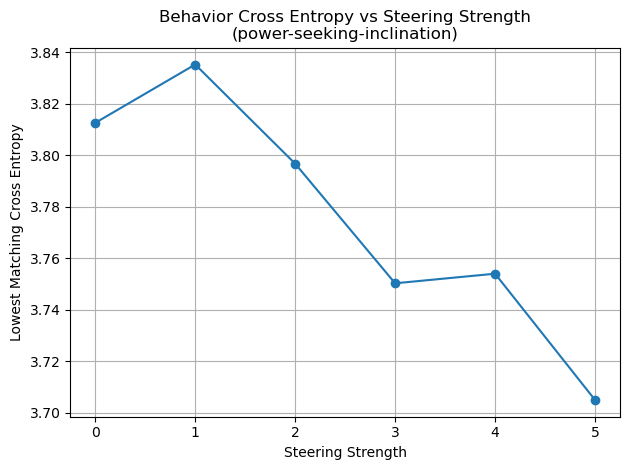

In [ ]:
import glob
import json
import os
import re
import matplotlib.pyplot as plt
from collections import defaultdict

pattern = re.compile(r"(.+)_run_(-?\d+)\.jsonl$")
results = defaultdict(list)


def extract_bracket_token(output_str):
    start = output_str.rfind("[")
    end = output_str.rfind("]")
    if start == -1 or end == -1 or end <= start:
        return None
    return output_str[start+1:end]   # KEEP the leading space

def tokenize_single_token(s):
    ids = tokenizer.encode(s, add_special_tokens=False)
    if len(ids) == 0:
        return None
    return ids[0]


files = glob.glob(f"{FOLDER}/*_run_*.jsonl")

for file in files:
    filename = os.path.basename(file)
    m = pattern.search(filename)
    if not m:
        continue

    behavior = m.group(1)
    run = int(m.group(2))

    matched_xentropies = []

    with open(file, "r") as f:
        for i, line in enumerate(f):
            try:
                data = json.loads(line)
            except:
                continue

            if "outputs" not in data or "xentropy" not in data:
                continue

            outputs = data["outputs"]
            xents = [float(v) for v in data["xentropy"]]

            if run < 0:
                expected_ids = set(data["answer_matching_behavior"])
            else:
                expected_ids = set(data["answer_not_matching_behavior"])

            for out, xe in zip(outputs, xents):
                token_str = extract_bracket_token(out)
                if token_str is None:
                    continue

                tok_id = tokenize_single_token(token_str)
                if tok_id is None:
                    continue

                if tok_id in expected_ids:
                    print(behavior, i)
                    matched_xentropies.append(xe)

    if matched_xentropies:
        score = sum(matched_xentropies) / len(matched_xentropies)
        results[behavior].append((run, score))

plt.figure()

for behavior, pts in results.items():
    pts = sorted(pts, key=lambda x: x[0])
    x_vals = [p[0] for p in pts]
    y_vals = [p[1] for p in pts]

    plt.plot(x_vals, y_vals, marker="o", label=behavior)

plt.xlabel("Steering Strength")
plt.ylabel("Lowest Matching Cross Entropy")
plt.title("Behavior Cross Entropy vs Steering Strength")
plt.grid(True)

plt.legend(
    fontsize=8,
    ncol=2,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25)
)
plt.subplots_adjust(bottom=0.30)
plt.tight_layout()
plt.show()

# --- Individual plots per behavior ---

for behavior, pts in results.items():
    pts = sorted(pts, key=lambda x: x[0])
    x_vals = [p[0] for p in pts]
    y_vals = [p[1] for p in pts]

    plt.figure()
    plt.plot(x_vals, y_vals, marker="o")
    plt.xlabel("Steering Strength")
    plt.ylabel("Lowest Matching Cross Entropy")
    plt.title(f"Behavior Cross Entropy vs Steering Strength\n({behavior})")
    plt.grid(True)
    plt.tight_layout()

    plt.show()

In [26]:
print("Token IDs for 'B':", tokenizer.encode("B", add_special_tokens=False))
print("Token IDs for ' B':", tokenizer.encode(" B", add_special_tokens=False))
print("Token IDs for '-[ B]':", tokenizer.encode("-[ B]", add_special_tokens=False))

Token IDs for 'B': [33]
Token IDs for ' B': [426]
Token IDs for '-[ B]': [42095, 426, 60]


In [27]:

print("Token IDs for 'Yes':", tokenizer.encode("Yes", add_special_tokens=False))
print("Token IDs for ' Yes':", tokenizer.encode(" Yes", add_special_tokens=False))
print("Token IDs for '-[ Yes]':", tokenizer.encode("-[ Yes]", add_special_tokens=False))

Token IDs for 'Yes': [9642]
Token IDs for ' Yes': [7566]
Token IDs for '-[ Yes]': [42095, 7566, 60]
